# 背景

In [17]:
import datetime

import matplotlib.pyplot as plt
import scipy.io
import cv2
import numpy as np
import pickle
from sklearn.tree import DecisionTreeClassifier
# %matplotlib notebook
from main_test import pony_run
from models import AnonymousColorDetector
from utils import lab_scatter

In [25]:
img_path = r"C:\Users\FEIJINTI\Desktop\7261\tobacco\Image_2022_0726_1410_31_993-000254.bmp"
# img_path = r"E:\zhouchao\725data\14.png"
model_path = ["models/background_dt_2022-07-26_15-56.model", "models/tobacco_dt_2022-07-26_15-57.model","models/zibian_dt_2022-07-21_16-45.model","models/dt_2022-07-21_17-19.model"]

In [26]:
img = cv2.imread(img_path)[:, :, ::-1]
# img = cv2.imread(img_path)
img = cv2.resize(img, (1024, 256))
b_detector = AnonymousColorDetector(file_path=model_path[0])
b_result = b_detector.predict(img).astype(np.uint8)

In [27]:
t_detector = AnonymousColorDetector(file_path=model_path[1])
t_result = t_detector.predict(img).astype(np.uint8)
t_result = cv2.dilate(t_result, kernel = np.ones((3, 3), np.uint8))

In [28]:
z_detector = AnonymousColorDetector(file_path=model_path[2])
z_result = z_detector.predict(img).astype(np.uint8)

In [29]:
s_detector = AnonymousColorDetector(file_path=model_path[3])
s_result = s_detector.predict(img).astype(np.uint8)

In [30]:
result = 1 - (b_result | t_result)

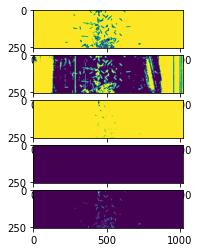

In [31]:
fig,axs = plt.subplots(5,1)
axs[0].imshow(b_result)
axs[1].imshow(t_result)
axs[2].imshow(z_result)
axs[3].imshow(result)
axs[4].imshow(1-s_result)
plt.savefig("1.png",dpi=900)

In [41]:
s = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)[..., 1]
high_s = s > 175

In [42]:
%matplotlib notebook
fig,axs = plt.subplots(3, 1)
axs[0].imshow(img)
axs[1].imshow(s)
axs[2].imshow(high_s)
plt.savefig("2.png",dpi=900)

<IPython.core.display.Javascript object>